In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, chi2_contingency

# 1. FoodPrice in Turkey

In [2]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


## 1.1 Giữa giá gạo ở National Average và thời gian có mối liên hệ với nhau hay không

In [14]:
rice_data = df[(df.ProductName == "Rice - Retail") & ( df.Place == "National Average")]
rice_data['time'] = pd.to_datetime(rice_data['Month'].astype(str) + '/' + rice_data['Year'].astype(str))
rice_data.describe()

/tmp/ipykernel_13520/2971135424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_data['time'] = pd.to_datetime(rice_data['Month'].astype(str) + '/' + rice_data['Year'].astype(str))


,ProductId,UmId,Month,Year,Price
count,66.0,66.0,66.000000,66.000000,66.000000
mean,52.0,5.0,6.454545,2016.257576,7.084923
std,0.0,0.0,3.561252,1.947864,1.417041
min,52.0,5.0,1.000000,2013.000000,4.492000
25%,52.0,5.0,3.000000,2015.000000,6.117500
50%,52.0,5.0,6.000000,2016.000000,6.523500
75%,52.0,5.0,9.750000,2018.000000,8.401025
max,52.0,5.0,12.000000,2019.000000,9.561600


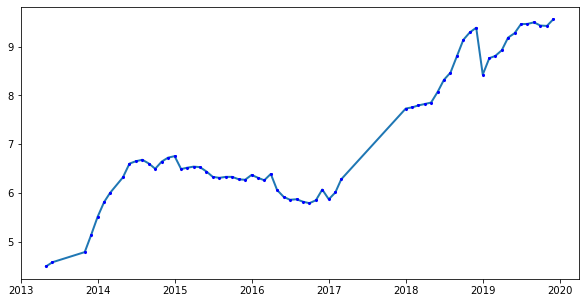

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(rice_data['time'], rice_data['Price'], linewidth = 2, 
         marker = '*', markersize=2, markerfacecolor='red',
         markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

### Biến đổi thời gian lấy 1/2013 làm mốc .

/tmp/ipykernel_13520/2101671821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_data['time_by_month'] = rice_data['Month'] + (rice_data['Year'] - 2013)*12


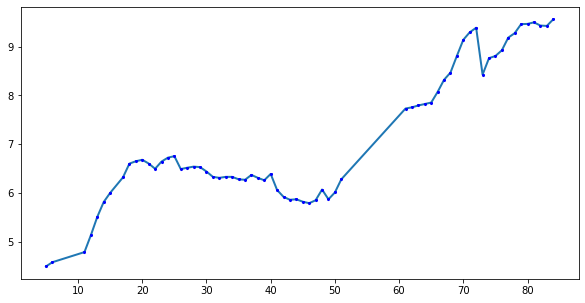

In [23]:
rice_data['time_by_month'] = rice_data['Month'] + (rice_data['Year'] - 2013)*12
plt.plot(rice_data['time_by_month'], rice_data['Price'], linewidth = 2,
        marker = '*', markersize = 2, markerfacecolor = 'red',
        markeredgecolor = 'blue', markeredgewidth = 2)
plt.show()

### Phát biểu giả thuyết 
- H0 : thời gian và giá gạo không có quan hệ.
- H1 : thời gian và gạo có mỗi quan hệ tương quan.

In [24]:
r, pvalue = pearsonr(x = rice_data['time_by_month'], y = rice_data['Price'])
print(f'Hệ số tương quan Pearson: {r}')
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.8836736355854856
p-value: 8.931326276852843e-23


### Kết luận : p-value rất nhỏ và r = 0.88
- Giữa thời gian và giá gạo có mối tương quan thuận rất chặt với nhau.